In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import  StandardScaler,OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

In [106]:
df = pd.read_csv("archive.zip", compression = "zip")

In [107]:
df.shape

(48842, 15)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [109]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [110]:
x = df.drop(columns = ["income"])
y = df["income"]


In [111]:
y = y.map({"<=50K": 0, ">50K":1})

In [112]:
y.value_counts(normalize = True)*100

income
0    76.071823
1    23.928177
Name: proportion, dtype: float64

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y, stratify = y, random_state = 36, test_size = 0.20)

Now EDA only on x_train

In [114]:
x_train.shape

(39073, 14)

In [115]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 16483 to 46518
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        39073 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       39073 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   39073 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


In [116]:
x_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,39073.000000,3.907300e+04,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.589947,1.899806e+05,10.084432,1103.047731,89.648786,40.398741
std,13.679127,1.056261e+05,2.576772,7616.067402,408.543598,12.386088
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784780e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.379430e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [117]:
all_train = pd.concat([x_train,y_train], axis = 1)

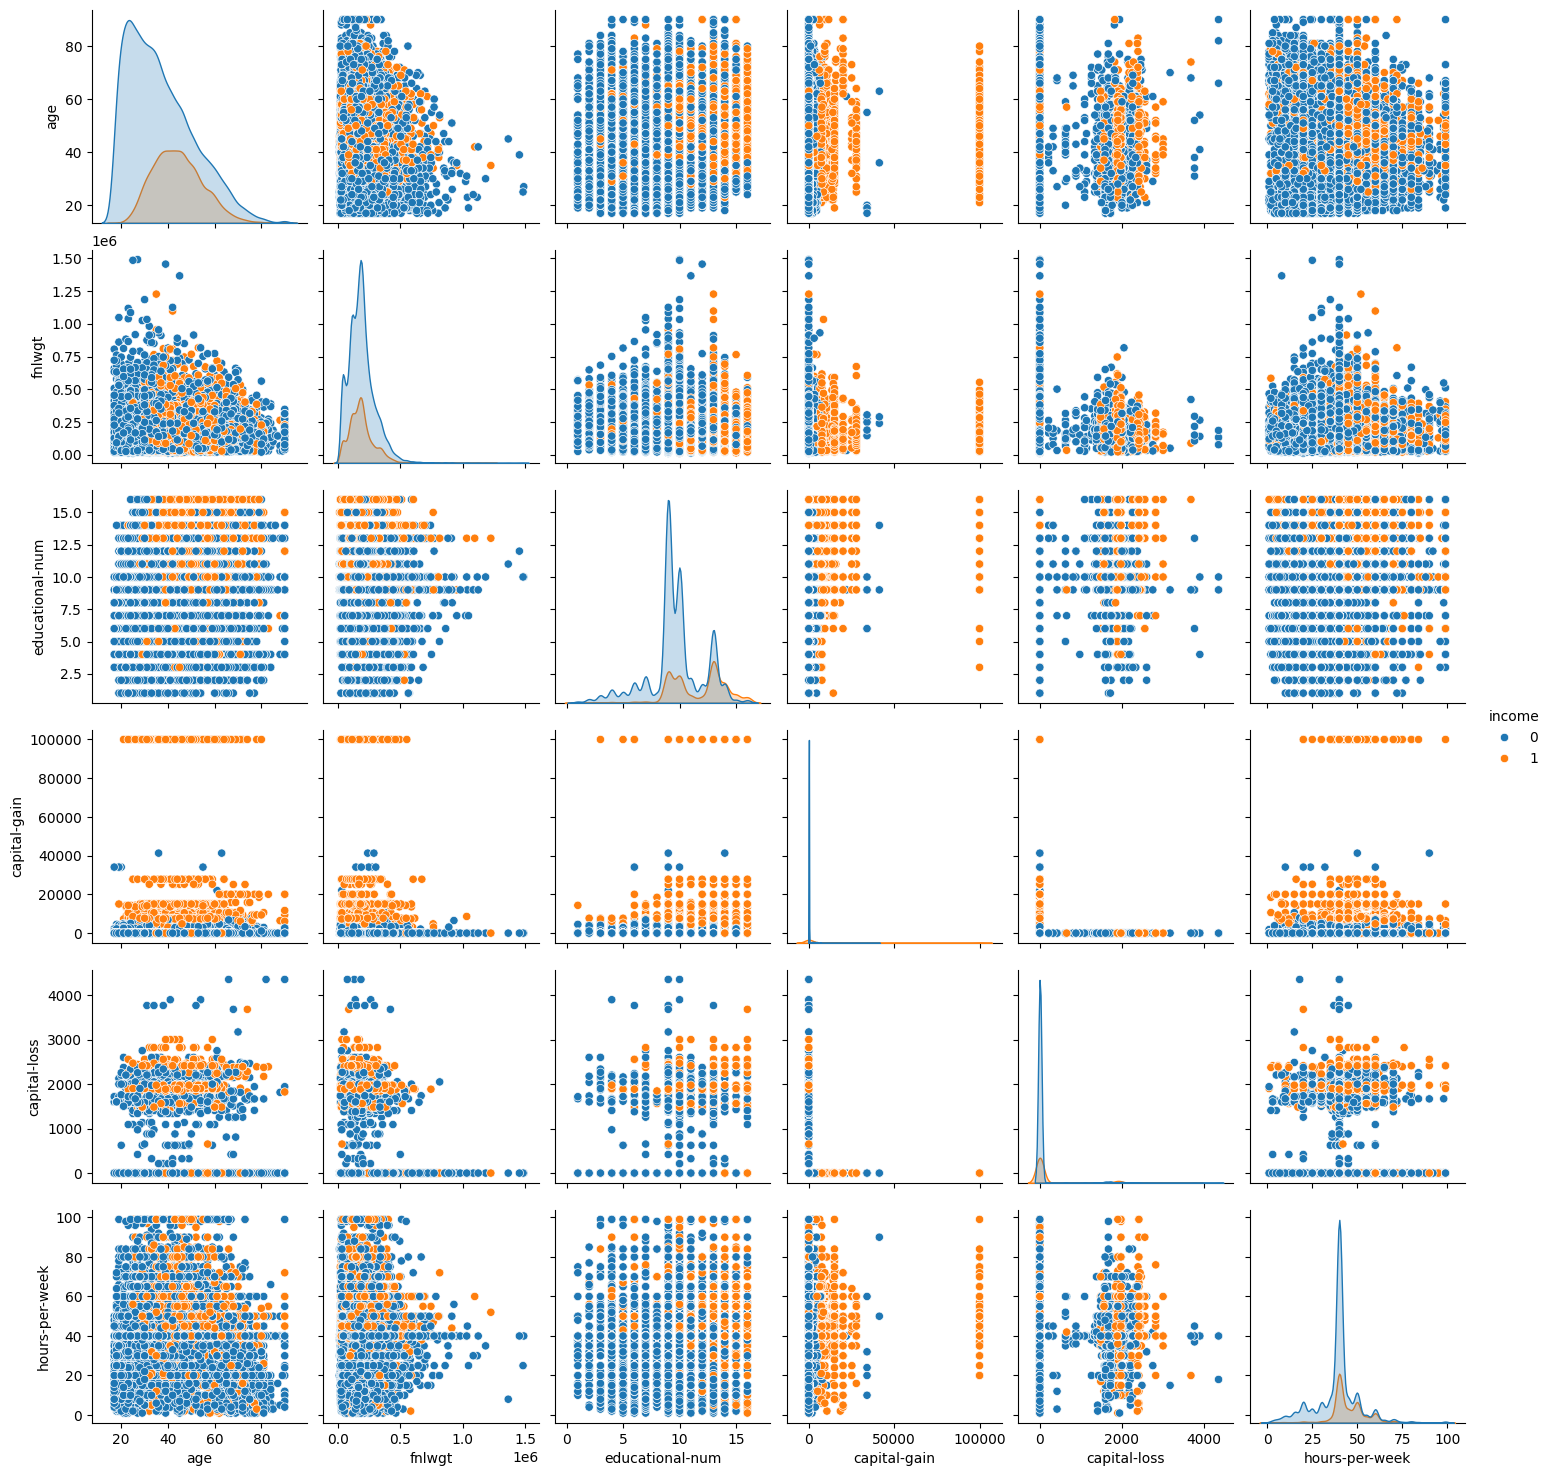

In [118]:
sns.pairplot(data = all_train, hue = "income")
plt.show()

In [119]:
correlation_matrix = all_train.corr(numeric_only = True)

In [120]:
correlation_matrix

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.078581,0.029033,0.079151,0.062660,0.075982,0.232412
fnlwgt,-0.078581,1.000000,-0.033265,-0.001905,-0.002638,-0.012758,-0.002231
educational-num,0.029033,-0.033265,1.000000,0.125639,0.081130,0.144903,0.330902
capital-gain,0.079151,-0.001905,0.125639,1.000000,-0.031782,0.082633,0.223935
capital-loss,0.062660,-0.002638,0.081130,-0.031782,1.000000,0.054075,0.149199
hours-per-week,0.075982,-0.012758,0.144903,0.082633,0.054075,1.000000,0.228049
income,0.232412,-0.002231,0.330902,0.223935,0.149199,0.228049,1.000000


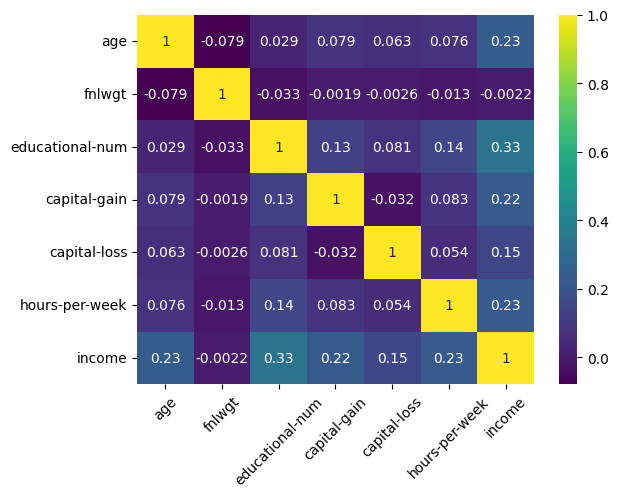

In [121]:
sns.heatmap(correlation_matrix, annot = True, cmap = "viridis")
plt.xticks(rotation = 45)
plt.show()

In [122]:
income_correlation = correlation_matrix["income"].sort_values(ascending = True)

In [123]:
income_correlation

fnlwgt            -0.002231
capital-loss       0.149199
capital-gain       0.223935
hours-per-week     0.228049
age                0.232412
educational-num    0.330902
income             1.000000
Name: income, dtype: float64

In [124]:
x_train.nunique()

age                   74
workclass              9
fnlwgt             24579
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         122
capital-loss          96
hours-per-week        95
native-country        42
dtype: int64

In this x_train, correlation with the column "fnlwgt" to label is very low(-0.002231) and its nunique value is 24579. So I am dropping that column. "race" and "gender" is also dropping because it is unethical. The column "educational-num" is dropping because it is the numerical version of the columm "education"


In [125]:
x = x.drop(columns = ["fnlwgt","educational-num","race","gender"])
x_train = x_train.drop(columns = ["fnlwgt","educational-num","race","gender"])
x_test = x_test.drop(columns = ["fnlwgt","educational-num","race","gender"])

In [126]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)

(39073, 10)
(9769, 10)
(48842, 10)


In [127]:
obj_columns = x_train.select_dtypes(include = ["object"]).columns

#Encoding for x_train
encoder = OneHotEncoder(sparse_output = False)
encoded = encoder.fit_transform(x_train[obj_columns])
encoded = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(obj_columns), index = x_train.index)

x_train = x_train.drop(columns = obj_columns)
x_train = pd.concat([x_train, encoded], axis = 1)

#Encoding for x_test
x_test_encoded = encoder.transform(x_test[obj_columns])
x_test_encoded = pd.DataFrame(x_test_encoded, columns = encoder.get_feature_names_out(obj_columns), index = x_test.index)

x_test = x_test.drop(columns = obj_columns)
x_test = pd.concat([x_test, x_test_encoded], axis = 1)

print(x_train.shape)
print(x_test.shape)

(39073, 99)
(9769, 99)


In [128]:
x_train.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
16483,51,0,0,50,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23635,60,0,0,24,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25897,32,0,0,40,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26456,50,0,0,60,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28904,25,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [129]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Accuracy Score of Logistic Regression Train:  0.8526348117625983
Accuracy Score of Logistic Regression Test:  0.8537209540382844
Confusion Matrix of Logistic Regression: 
[[6917  514]
 [ 915 1423]]


Classification Report of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7431
           1       0.73      0.61      0.67      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769





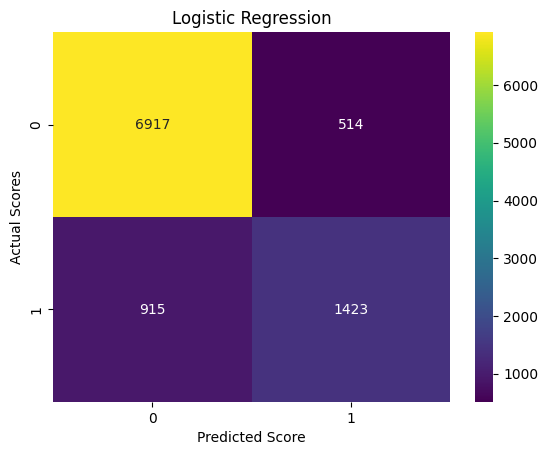

In [130]:
# model 1 = LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train,y_train)

y_pred_model1 = model1.predict(x_test)
accuracy_model1_train = model1.score(x_train,y_train)
accuracy_model1_test = model1.score(x_test,y_test)
matrix_model1 = confusion_matrix(y_test,y_pred_model1)
report_model1 = classification_report(y_test,y_pred_model1)

print("Accuracy Score of Logistic Regression Train: ",accuracy_model1_train)
print("Accuracy Score of Logistic Regression Test: ",accuracy_model1_test)
print("Confusion Matrix of Logistic Regression: ")
print(matrix_model1)
print("\n")
print("Classification Report of Logistic Regression: ")
print(report_model1)
print("\n")

sns.heatmap(matrix_model1, annot = True, fmt = "d", cmap = "viridis")
plt.title("Logistic Regression")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of SVM Classifier Train:  0.851662273180969
Accuracy Score of SVM Classifier Test:  0.8544375063977889
Confusion Matrix of SVM Classifier: 
[[6961  470]
 [ 952 1386]]


Classification Report of SVM Classifier: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7431
           1       0.75      0.59      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769





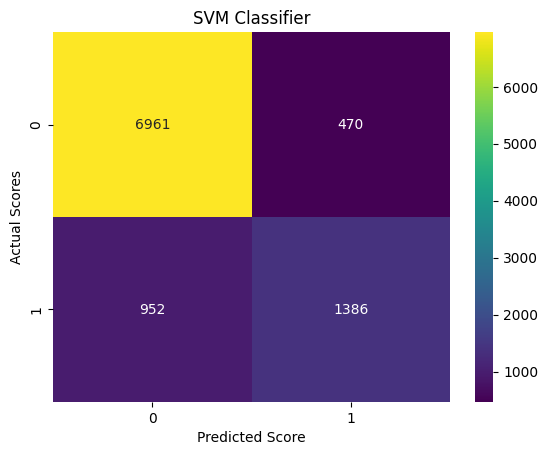

In [131]:
# model 2 = SVM Classifier

model2 = SVC(kernel = "linear")
model2.fit(x_train,y_train)

y_pred_model2 = model2.predict(x_test)
accuracy_model2_train = model2.score(x_train,y_train)
accuracy_model2_test = model2.score(x_test,y_test)
matrix_model2 = confusion_matrix(y_test,y_pred_model2)
report_model2 = classification_report(y_test,y_pred_model2)

print("Accuracy Score of SVM Classifier Train: ",accuracy_model2_train)
print("Accuracy Score of SVM Classifier Test: ",accuracy_model2_test)
print("Confusion Matrix of SVM Classifier: ")
print(matrix_model2)
print("\n")
print("Classification Report of SVM Classifier: ")
print(report_model2)
print("\n")

sns.heatmap(matrix_model2, annot = True, fmt = "d", cmap = "viridis")
plt.title("SVM Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Decision Tree Classifier Train:  0.8658920482174391
Accuracy Score of Decision Tree Classifier Test:  0.8572013512130208
Confusion Matrix of Decision Classifier: 
[[7043  388]
 [1007 1331]]


Classification Report of Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7431
           1       0.77      0.57      0.66      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769





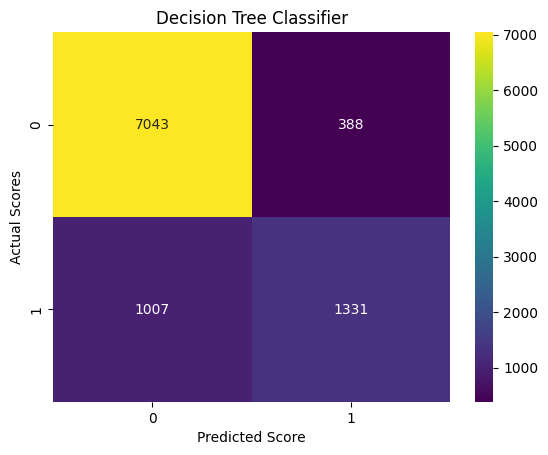

In [132]:
# model 3 = Decision Tree

model3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, random_state = 36)
model3.fit(x_train,y_train)

y_pred_model3 = model3.predict(x_test)
accuracy_model3_train = model3.score(x_train,y_train)
accuracy_model3_test = model3.score(x_test,y_test)
matrix_model3 = confusion_matrix(y_test,y_pred_model3)
report_model3 = classification_report(y_test,y_pred_model3)

print("Accuracy Score of Decision Tree Classifier Train: ",accuracy_model3_train)
print("Accuracy Score of Decision Tree Classifier Test: ",accuracy_model3_test)
print("Confusion Matrix of Decision Classifier: ")
print(matrix_model3)
print("\n")
print("Classification Report of Decision Tree Classifier: ")
print(report_model3)
print("\n")

sns.heatmap(matrix_model3, annot = True, fmt = "d", cmap = "viridis")
plt.title("Decision Tree Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Random Forest Classifier Train:  0.8729813426151051
Accuracy Score of Random Forest Classifier Test:  0.8645716040536391
Confusion Matrix of Random Forest Classifier: 
[[7107  324]
 [ 999 1339]]


Classification Report of Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      7431
           1       0.81      0.57      0.67      2338

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.86      9769





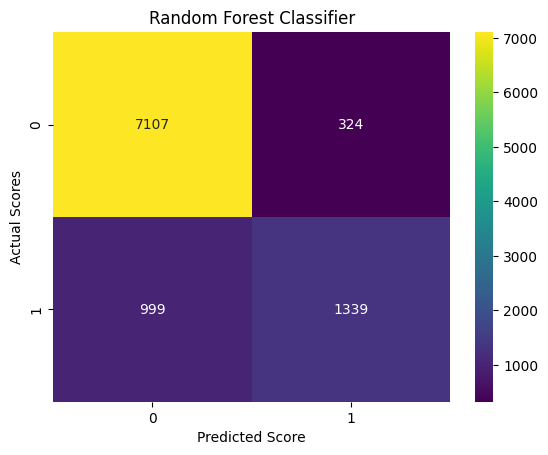

In [133]:
# model 4 = Random Forest Classifier

model4 = RandomForestClassifier(criterion = "entropy", n_estimators = 200, min_samples_split = 3, max_depth = 14, random_state = 36)
model4.fit(x_train,y_train)

y_pred_model4 = model4.predict(x_test)
accuracy_model4_train = model4.score(x_train,y_train)
accuracy_model4_test = model4.score(x_test,y_test)
matrix_model4 = confusion_matrix(y_test,y_pred_model4)
report_model4 = classification_report(y_test,y_pred_model4)

print("Accuracy Score of Random Forest Classifier Train: ",accuracy_model4_train)
print("Accuracy Score of Random Forest Classifier Test: ",accuracy_model4_test)
print("Confusion Matrix of Random Forest Classifier: ")
print(matrix_model4)
print("\n")
print("Classification Report of Random Forest Classifier: ")
print(report_model4)
print("\n")

sns.heatmap(matrix_model4, annot = True, fmt = "d", cmap = "viridis")
plt.title("Random Forest Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of XGBoost Classifier Train:  0.8803777544596013
Accuracy Score of XGBoost Classifier Test:  0.8768553587880029
Confusion Matrix of XGBoost Classifier: 
[[7035  396]
 [ 807 1531]]


Classification Report of XGBoost Classifier: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7431
           1       0.79      0.65      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.85      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769





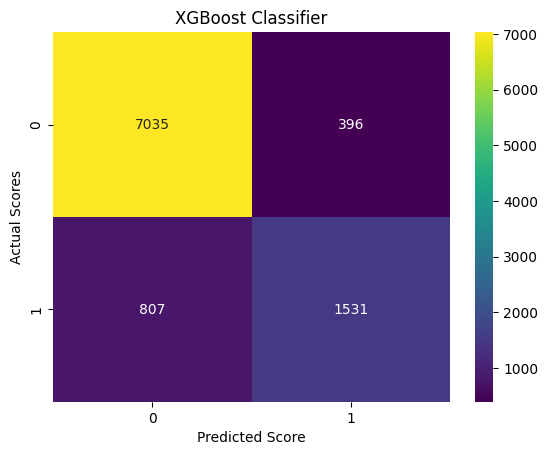

In [134]:
# model 5 = XGBoost Classifier

model5 = XGBClassifier(objective = "binary:logistic", n_estimators = 200, learning_rate = .1, max_depth = 5, random_state = 36)
model5.fit(x_train,y_train)

y_pred_model5 = model5.predict(x_test)
accuracy_model5_train = model5.score(x_train,y_train)
accuracy_model5_test = model5.score(x_test,y_test)
matrix_model5 = confusion_matrix(y_test,y_pred_model5)
report_model5 = classification_report(y_test,y_pred_model5)

print("Accuracy Score of XGBoost Classifier Train: ",accuracy_model5_train)
print("Accuracy Score of XGBoost Classifier Test: ",accuracy_model5_test)
print("Confusion Matrix of XGBoost Classifier: ")
print(matrix_model5)
print("\n")
print("Classification Report of XGBoost Classifier: ")
print(report_model5)
print("\n")

sns.heatmap(matrix_model5, annot = True, fmt = "d", cmap = "viridis")
plt.title("XGBoost Classifier")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

Accuracy Score of Gaussian NB Train:  0.49909144421979373
Accuracy Score of Gaussian NB Test:  0.49585423277715224
Confusion Matrix of Gaussian NB: 
[[2599 4832]
 [  93 2245]]


Classification Report of Gaussian NB: 
              precision    recall  f1-score   support

           0       0.97      0.35      0.51      7431
           1       0.32      0.96      0.48      2338

    accuracy                           0.50      9769
   macro avg       0.64      0.65      0.50      9769
weighted avg       0.81      0.50      0.50      9769





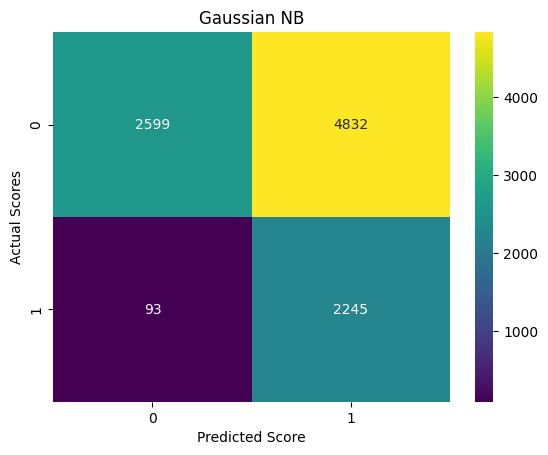

In [135]:
# model 6 = Gaussian NB

model6 = GaussianNB()
model6.fit(x_train,y_train)

y_pred_model6 = model6.predict(x_test)
accuracy_model6_train = model6.score(x_train,y_train)
accuracy_model6_test = model6.score(x_test,y_test)
matrix_model6 = confusion_matrix(y_test,y_pred_model6)
report_model6 = classification_report(y_test,y_pred_model6)

print("Accuracy Score of Gaussian NB Train: ",accuracy_model6_train)
print("Accuracy Score of Gaussian NB Test: ",accuracy_model6_test)
print("Confusion Matrix of Gaussian NB: ")
print(matrix_model6)
print("\n")
print("Classification Report of Gaussian NB: ")
print(report_model6)
print("\n")

sns.heatmap(matrix_model6, annot = True, fmt = "d", cmap = "viridis")
plt.title("Gaussian NB")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Scores")
plt.show()

In [136]:
models_accuracy = {
    "Logistc Regression": accuracy_model1_test,
    "SVM Classifier": accuracy_model2_test,
    "Decision Tree Classifier": accuracy_model3_test,
    "Random Forest Classifier": accuracy_model4_test,
    "XGBClassifier": accuracy_model5_test,
    "GaussianNB": accuracy_model6_test
}

In [137]:

best_model_name = None
best_model_accuracy = 0

for a,b in models_accuracy.items():
    if b > best_model_accuracy:
        best_model_name = a
        best_model_accuracy = b

In [138]:
print(best_model_name)
print(best_model_accuracy)

XGBClassifier
0.8768553587880029


In [139]:
x.shape

(48842, 10)

In [140]:
x.head()

,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,0,0,30,United-States


In [141]:
y.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

In [142]:
final_encoder = OneHotEncoder(sparse_output = False)
x_encoded = final_encoder.fit_transform(x[obj_columns])
x_encoded = pd.DataFrame(x_encoded, columns = final_encoder.get_feature_names_out(obj_columns), index = x.index)

x = x.drop(columns = obj_columns)
x = pd.concat([x, x_encoded], axis = 1)

print(x.shape)

(48842, 99)


In [143]:
x.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,0,0,50,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,0,0,40,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,7688,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,0,0,30,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
final_scaler = StandardScaler()
x = final_scaler.fit_transform(x)

final_model = XGBClassifier(n_estimators = 200, objective = "binary:logistic", learning_rate = 0.1, max_depth = 10, random_state = 36)
final_model.fit(x,y)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [145]:
with open("final_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

with open("final_encoder.pkl", "wb") as file:
    pickle.dump(final_encoder, file)

with open("final_scaler.pkl", "wb") as file:
    pickle.dump(final_scaler, file)
